In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from collections import Counter
from collections import defaultdict
import gensim
import matplotlib.colors as mcolors


In [3]:
# load the data 
df = pd.read_csv('conspiracy_processed.csv')
# create a date object
df['date'] = pd.to_datetime(df['created_utc'])

In [4]:
df_2019 = df[df['date'] < '2020-01-01']
df_2021 = df[df['date'] > '2020-01-01']

df_2019 = df_2019.dropna()
df_2021 = df_2021.dropna()

### Gensim

In [5]:
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS

In [6]:
df19_document_list = df_2019['selftext_nostop'].tolist()
df21_document_list = df_2021['selftext_nostop'].tolist()

In [7]:
type(df19_document_list)

list

In [8]:
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
from nltk.corpus import stopwords
import string

In [9]:
stopeng = set(stopwords.words('english'))

a = []
df21_phrases_input = []

for item in df19_document_list:
    df19_phrases_input.append([item_.lower().translate(str.maketrans('','',string.punctuation)) for item_ in item.split(" ") if item_.lower() not in stopeng and len(item_)>1])

for item in df21_document_list:
    df21_phrases_input.append([item_.lower().translate(str.maketrans('','',string.punctuation)) for item_ in item.split(" ") if item_.lower() not in stopeng and len(item_)>1])


In [10]:
# we will use default parameter values for now
df19_phrasemodel = gensim.models.phrases.Phrases(df19_phrases_input, 
                                                  min_count=100, # default
                                                  threshold=10, # default
                                                  connector_words=ENGLISH_CONNECTOR_WORDS)

df21_phrasemodel = gensim.models.phrases.Phrases(df21_phrases_input, 
                                                  min_count=100, # default
                                                  threshold=5, # default
                                                  connector_words=ENGLISH_CONNECTOR_WORDS)

In [11]:
# trained phrase model to actually extract phrases
df19_phrases = df19_phrasemodel[df19_phrases_input]
df21_phrases = df21_phrasemodel[df21_phrases_input]

In [12]:
dict_19 = {}
for phrase, score in df19_phrasemodel.find_phrases(df19_phrases_input).items():
    #print(phrase, score)
    dict_19[phrase] = score

dict_21 = {}
for phrase, score in df21_phrasemodel.find_phrases(df21_phrases_input).items():
    #print(phrase, score)
    dict_21[phrase] = score

In [13]:
df_bigram_19 = pd.DataFrame(
    {"bigrams": dict_19.keys(), "scores": dict_19.values()}
)

df_bigram_21 = pd.DataFrame(
    {"bigrams": dict_21.keys(), "scores": dict_21.values()}
)

In [14]:
df_bigram_19.sort_values(by=['scores'],ascending=False)

,bigrams,scores
8,gon_na,2146.456255
69,hong_kong,1903.432333
44,alex_jones,1438.705814
50,sandy_hook,966.630469
37,rabbit_hole,862.357485
...,...,...
57,right_wing,16.792126
17,world_war,14.544277
53,first_time,13.760616
4,whats_going,12.422382


In [57]:
df_bigram_19_top = df_bigram_19.sort_values(by=['scores'],ascending=False).head(30)

In [58]:
df_bigram_19_top

,bigrams,scores
8,gon_na,2146.456255
69,hong_kong,1903.432333
44,alex_jones,1438.705814
50,sandy_hook,966.630469
37,rabbit_hole,862.357485
46,saudi_arabia,796.255262
36,mk_ultra,728.283230
33,united_states,570.071243
48,federal_reserve,570.041284
47,false_flag,547.578126


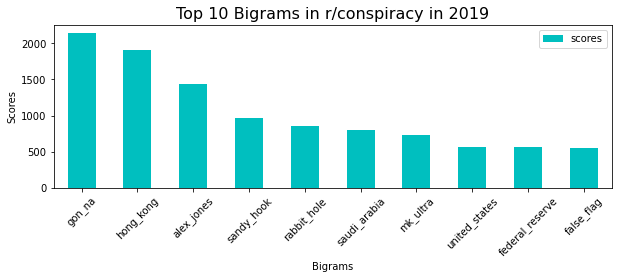

In [17]:
plt.rcParams["figure.figsize"] = (10,3)
ax = df_bigram_19_top.plot.bar(x='bigrams', rot=0, color = 'c')
plt.xticks(rotation = 45,fontsize = 10) 
plt.xlabel('Bigrams', fontsize = 10)
plt.ylabel('Scores', fontsize = 10)
plt.title('Top 10 Bigrams in r/conspiracy in 2019', fontsize = 16)
plt.show()

In [18]:
df_bigram_21.sort_values(by=['scores'],ascending=False)

,bigrams,scores
6,gon_na,1285.743060
58,spike_protein,735.754869
2,united_states,552.090278
46,wan_na,494.632919
4,delta_variant,359.845812
...,...,...
39,lot_people,6.006694
16,first_time,5.695564
1,last_years,5.266425
50,ive_never,5.012673


In [55]:
df_bigram_21_top = df_bigram_21.sort_values(by=['scores'],ascending=False).head(30)

In [56]:
df_bigram_21_top

,bigrams,scores
6,gon_na,1285.743060
58,spike_protein,735.754869
2,united_states,552.090278
46,wan_na,494.632919
4,delta_variant,359.845812
20,bill_gates,318.155291
31,side_effects,304.402281
53,blood_clots,303.184496
15,natural_immunity,252.930164
21,big_pharma,239.703232


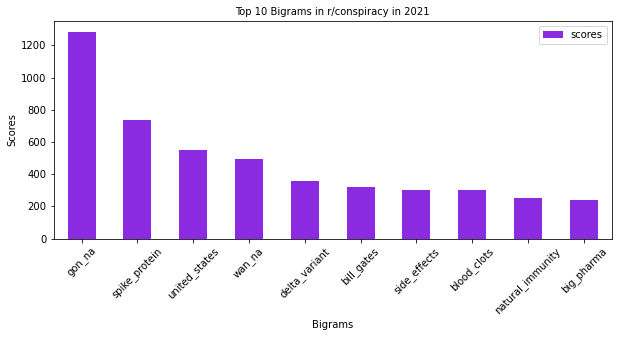

In [21]:
plt.rcParams["figure.figsize"] = (10,4)
ax = df_bigram_21_top.plot.bar(x='bigrams', rot=0, color = 'blueviolet')
plt.xticks(rotation = 45,fontsize = 10) 
plt.xlabel('Bigrams', fontsize = 10)
plt.ylabel('Scores', fontsize = 10)
plt.title('Top 10 Bigrams in r/conspiracy in 2021', fontsize = 10)
plt.show()

## Trigrams

In [23]:
# Build the bigram and trigram model
bigram_19 = gensim.models.phrases.Phrases(df19_phrases_input, min_count=3, threshold=10)
trigram_19 = gensim.models.phrases.Phrases(bigram_19[df19_phrases_input], threshold=5)

In [24]:
trigrams_19_list = []
for i in range(len(df19_phrases_input)):
    trigrams_19_list.append(trigram_19[bigram_19[df19_phrases_input[i]]])

In [ ]:
# word embeddings

In [26]:
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency

import spacy  # For preprocessing

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [32]:
from gensim.models.phrases import Phrases, Phraser


In [27]:
import multiprocessing

from gensim.models import Word2Vec

In [30]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer

In [36]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     vector_size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

INFO - 11:11:22: Word2Vec lifecycle event {'params': 'Word2Vec<vocab=0, vector_size=300, alpha=0.03>', 'datetime': '2022-05-30T11:11:22.800031', 'gensim': '4.2.0', 'python': '3.7.7 (default, May  6 2020, 04:59:01) \n[Clang 4.0.1 (tags/RELEASE_401/final)]', 'platform': 'Darwin-20.6.0-x86_64-i386-64bit', 'event': 'created'}


In [37]:
sentences = bigram_19[df19_phrases_input]

In [38]:
t = time()

w2v_model.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 11:12:51: collecting all words and their counts
INFO - 11:12:51: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 11:12:53: PROGRESS: at sentence #10000, processed 1008366 words, keeping 103048 word types
INFO - 11:12:54: collected 128107 word types from a corpus of 1455213 raw words and 14889 sentences
INFO - 11:12:54: Creating a fresh vocabulary
INFO - 11:12:55: Word2Vec lifecycle event {'msg': 'effective_min_count=20 retains 9324 unique words (7.28% of original 128107, drops 118783)', 'datetime': '2022-05-30T11:12:55.049031', 'gensim': '4.2.0', 'python': '3.7.7 (default, May  6 2020, 04:59:01) \n[Clang 4.0.1 (tags/RELEASE_401/final)]', 'platform': 'Darwin-20.6.0-x86_64-i386-64bit', 'event': 'prepare_vocab'}
INFO - 11:12:55: Word2Vec lifecycle event {'msg': 'effective_min_count=20 leaves 1120771 word corpus (77.02% of original 1455213, drops 334442)', 'datetime': '2022-05-30T11:12:55.049664', 'gensim': '4.2.0', 'python': '3.7.7 (default, May  6 2020, 04

Time to build vocab: 0.07 mins


In [39]:
t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 11:13:52: Word2Vec lifecycle event {'msg': 'training model with 7 workers on 9324 vocabulary and 300 features, using sg=0 hs=0 sample=6e-05 negative=20 window=2 shrink_windows=True', 'datetime': '2022-05-30T11:13:52.102940', 'gensim': '4.2.0', 'python': '3.7.7 (default, May  6 2020, 04:59:01) \n[Clang 4.0.1 (tags/RELEASE_401/final)]', 'platform': 'Darwin-20.6.0-x86_64-i386-64bit', 'event': 'train'}
INFO - 11:13:53: EPOCH 0 - PROGRESS: at 24.41% examples, 175818 words/s, in_qsize 0, out_qsize 2
INFO - 11:13:54: EPOCH 0 - PROGRESS: at 50.53% examples, 182124 words/s, in_qsize 0, out_qsize 1
INFO - 11:13:55: EPOCH 0 - PROGRESS: at 74.90% examples, 183306 words/s, in_qsize 0, out_qsize 1
INFO - 11:13:56: EPOCH 0: training on 1455213 raw words (742736 effective words) took 4.0s, 184547 effective words/s
INFO - 11:13:57: EPOCH 1 - PROGRESS: at 25.66% examples, 187588 words/s, in_qsize 0, out_qsize 1
INFO - 11:13:58: EPOCH 1 - PROGRESS: at 52.00% examples, 192690 words/s, in_qsize 0, o

INFO - 11:15:05: EPOCH 18 - PROGRESS: at 25.14% examples, 190447 words/s, in_qsize 0, out_qsize 0
INFO - 11:15:06: EPOCH 18 - PROGRESS: at 50.53% examples, 189449 words/s, in_qsize 0, out_qsize 0
INFO - 11:15:07: EPOCH 18 - PROGRESS: at 73.93% examples, 185247 words/s, in_qsize 0, out_qsize 1
INFO - 11:15:08: EPOCH 18: training on 1455213 raw words (742532 effective words) took 4.0s, 185373 effective words/s
INFO - 11:15:09: EPOCH 19 - PROGRESS: at 23.80% examples, 181178 words/s, in_qsize 0, out_qsize 0
INFO - 11:15:10: EPOCH 19 - PROGRESS: at 48.75% examples, 182251 words/s, in_qsize 0, out_qsize 0
INFO - 11:15:11: EPOCH 19 - PROGRESS: at 71.73% examples, 181492 words/s, in_qsize 0, out_qsize 1
INFO - 11:15:12: EPOCH 19 - PROGRESS: at 98.23% examples, 181057 words/s, in_qsize 0, out_qsize 0
INFO - 11:15:12: EPOCH 19: training on 1455213 raw words (741808 effective words) took 4.1s, 181432 effective words/s
INFO - 11:15:13: EPOCH 20 - PROGRESS: at 24.52% examples, 179017 words/s, in_q

Time to train the model: 2.02 mins


In [40]:
w2v_model.init_sims(replace=True)

/Users/zhaoshuang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  """Entry point for launching an IPython kernel.
WARNING - 11:16:02: destructive init_sims(replace=True) deprecated & no longer required for space-efficiency


In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE